# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

#### Для начала подгрузим все необходимые пакеты и данные

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('adult.csv', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"])

In [41]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Перейдем к решению

In [24]:
gender_list = df['sex'].tolist()
nmales = gender_list.count(' Male')
nfemales = gender_list.count(' Female')
print('В данных', nmales, 'мужчин', 'и', nfemales, 'женщина')

В данных 21790 мужчин и 10771 женщина


### Вопрос 2
Каков средний возраст мужчин?


##### Для начала создадим датафрейм, в котором присутствуют только мужчины, а далее из соображений разумности сразу округлим искомый ответ, при этом используя функцию mean

In [33]:
df_male = df[df.sex != ' Female']
mean_age = round(np.mean(df_male['age']))
print('Средний возраст мужчин -', mean_age, 'лет.')

Средний возраст мужчин - 39 лет.


### Вопрос 3
Какова доля граждан США?

In [47]:
usa = df['native-country'].tolist().count(' United-States')/len(df['native-country'])
print('Доля граждан США составляет', round(usa*100, 2), '%.')

Доля граждан США составляет 89.59 %.


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

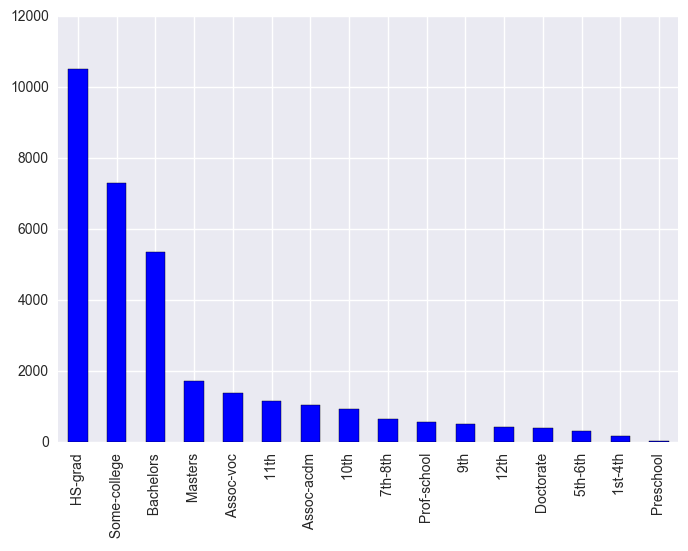

In [68]:
df['education'].value_counts().plot(kind = 'bar', color = 'b')

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [74]:
df_div = df[df['marital-status'] == ' Divorced']
mean_fw = df_div.fnlwgt.mean()
std_fw = df_div.fnlwgt.std()
print('Среднее и стандартное отклонение для переменной fnlwgt для разведенных людей составляют', 
      round(mean_fw,2), 'и', round(std_fw,2), 'соответственно.')

Среднее и стандартное отклонение для переменной fnlwgt для разведенных людей составляют 185802.79 и 105646.79 соответственно.


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

Сформулируем алгоритм, подтверждающий или опровергающий данное утверждение: для начала создадим датафрейм для респондентов с доходом более 50 тысяч, затем посмотрим, какую долю составляют те из них, кто имеет высшее образование и сделаем соответствующие выводы

In [75]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

Насколько я могу понимать, высшим образованием можно назвать степени: Bachelors, Masters, Doctorate

In [91]:
df_educ = df[df['50K'] == ' >50K']
high_rate = (df_educ.education.tolist().count(' Bachelors') + df_educ.education.tolist().count(' Masters')
             + df_educ.education.tolist().count(' Doctorate'))/len(df_educ.education)
print('Доля людей, имеющих высшее образование среди тех, кто зарабатывает более 50 тысяч составляет', 
      round(high_rate, 2)*100, '%')

Доля людей, имеющих высшее образование среди тех, кто зарабатывает более 50 тысяч составляет 44.0 %


Таким образом, данное утверждение неверно, поскольку доля тех, кто имеет высшее образование при доходе более 50 тысяч меньше 50%

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [93]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

#### Для мужчин:

In [105]:
male_ages = []
for i in df.race.unique():
    male_ages.append(max(df_male[df_male.race == i].age))
for _ in range(5):
    print(df.race.unique()[_], ' - ', male_ages[_])

 White  -  90
 Black  -  90
 Asian-Pac-Islander  -  90
 Amer-Indian-Eskimo  -  82
 Other  -  77


#### Для женщин:

In [106]:
df_female = df[df.sex == ' Female']
female_ages = []
for i in df.race.unique():
    female_ages.append(max(df_female[df_female.race == i].age))
for _ in range(5):
    print(df.race.unique()[_], ' - ', female_ages[_])

 White  -  90
 Black  -  90
 Asian-Pac-Islander  -  75
 Amer-Indian-Eskimo  -  80
 Other  -  74


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [108]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [109]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [129]:
countries_ff = df[df.occupation == ' Farming-fishing']['native-country'].unique()
countries_ff = [i for i in countries_ff if i != ' ?']
print('Список стран, люди из которых работают фермерами или рыбаками:')
for _ in range(len(countries_ff)):
    print(countries_ff[_])

Список стран, люди из которых работают фермерами или рыбаками:
 United-States
 Cambodia
 Poland
 Guatemala
 Mexico
 England
 Philippines
 Italy
 Puerto-Rico
 Vietnam
 Germany
 Japan
 Canada
 Yugoslavia
 Cuba
 Portugal
 El-Salvador
 Hong
 Ireland
 France


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [132]:
male_ratio = df_male.education.tolist().count(' Bachelors')/df_male.education.tolist().count(' Masters')
female_ratio = df_female.education.tolist().count(' Bachelors')/df_female.education.tolist().count(' Masters')
if male_ratio > female_ratio:
    print('Первое отношение больше')
elif male_ratio < female_ratio:
    print('Второе отношение больше')
else:
    print('Данные отношения равны')

Первое отношение больше


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [135]:
print('Максимальное количество рабочих часов в неделю составляет', max(df['hours-per-week']), 'часов.')

Максимальное количество рабочих часов в неделю составляет 99 часов.


In [136]:
print('Количество людей, работающих 99 часов в неделю, составляет', len(df[df['hours-per-week'] == 99]), 'человек.')

Количество людей, работающих 99 часов в неделю, составляет 85 человек.


In [141]:
df_hard = df[df['hours-per-week'] == 99]
df_hard['50K'].unique().tolist()

[' >50K', ' <=50K']

Иными словами, люди, работающие по 99 часов в неделю зарабатывают как больше 50 тысяч, так и меньше. Разберемся, какова все-таки доля тех, кто зарабатывает больше 50 тысяч

In [144]:
df_hard['50K'].tolist().count(' >50K')/len(df_hard['50K'])

0.29411764705882354

Как мы видим, всего 30% от всех людей, работающих 99 часов в неделю, зарабатывают больше 50 тысяч. Возможно, это связано с тем, что данные респонденты решили скрыть настоящее количество часов работы в неделю (что сходится с логикой числа 99 - кто вообще именно столько часов работает??)